<a href="https://colab.research.google.com/github/bharathreddy-2802/BharathSimhaReddy_INFO5731_Fall2024/blob/main/Samala_BharathSimhaReddy_INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

# **Question 1: Topic Modeling**

**This question aims to enhance your understanding of topic modeling by exploring how it connects document content to human-meaningful insights. Using the dataset provided in Assignment 3, write a Python program to identify the top 10 topics in the dataset.**

* The features (text representation) used for topic modeling.
* The top 10 clusters identified through topic modeling.
* A summary and description of the topics for each cluster.

In [1]:
import nltk
import os
nltk_data_dir = "/content/nltk_data"
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)
nltk.data.path.append(nltk_data_dir)
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)
print("NLTK Data is stored at:", nltk_data_dir)


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK Data is stored at: /content/nltk_data


[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install bertopic


import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Custom Directory for NLTK Data

nltk_data_dir = "/content/nltk_data"
os.makedirs(nltk_data_dir, exist_ok=True)
os.environ['NLTK_DATA'] = nltk_data_dir

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import regexp_tokenize

def preprocess_text(text):
    """Lowercase, tokenize, remove stopwords and non-alphanumeric tokens."""
    text = text.lower()
    tokens = regexp_tokenize(text, pattern=r'\s|[\.,;!?\-"(){}[]\n\t]', gaps=True)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

#  Loading Dataset
with open("/content/dataset-analysis.txt", "r") as file:
    data = file.readlines()

# Filtering out short lines and numeric-only lines
reviews = [line.strip() for line in data if len(line.split()) > 5 and not line.strip().isdigit()]

processed_reviews = [preprocess_text(review) for review in reviews]

# Vectorizing the Text Data
count_vectorizer = CountVectorizer(max_features=1000)
count_matrix = count_vectorizer.fit_transform(processed_reviews)

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda_model.fit_transform(count_matrix)

def display_topics(model, feature_names, no_top_words):
    """Display the top words for each topic."""
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

lda_feature_names = count_vectorizer.get_feature_names_out()

# Displaying the top 10 words for each topic
lda_top_topics = display_topics(lda_model, lda_feature_names, 10)

print("Top 10 Topics Identified by LDA:")
for idx, topic in enumerate(lda_top_topics):
    print(f"Topic {idx + 1}: {', '.join(topic)}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 10 Topics Identified by LDA:
Topic 1: one, smartphone, use, many, like, much, 3000, recharge, next, size
Topic 2: great, many, like, use, good, much, need, looking, product, others
Topic 3: great, many, like, use, good, much, need, looking, product, others
Topic 4: great, many, like, use, good, much, need, looking, product, others
Topic 5: battery, new, used, driver, replace, two, sided, quality, someone, ordering
Topic 6: good, looking, eyes, product, others, mirror, take, keep, hurt, idea
Topic 7: great, many, like, use, good, much, need, looking, product, others
Topic 8: need, iphone, left, using, provided, case, lighting, battery, always, able
Topic 9: card, amazon, memory, phone, great, would, screen, open, qualify, fun
Topic 10: great, many, like, use, good, much, need, looking, product, others


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Question 2: Sentiment Analysis**

**Sentiment analysis, also known as opinion mining, is a subfield of Natural Language Processing (NLP) focused on building machine learning algorithms to classify text based on the sentiment it conveys (e.g., positive, negative, or neutral). The objective of this task is to develop a machine learning classifier for sentiment analysis using the dataset from Assignment 3.**

**Instructions**
Write a Python program to implement a sentiment classifier and evaluate its performance. Ensure the data is split into 80% for training and 20% for testing. Your submission should include the following:

**Feature Selection:**

* Identify the features used for sentiment classification.
*Provide a detailed explanation of your feature selection in a markdown cell.

**Model Implementation:**

* Select two supervised learning algorithms/models from the scikit-learn library to build sentiment classifiers.
* Perform cross-validation (5-fold or 10-fold) for each model. You can refer to the scikit-learn cross-validation guide.

**Performance Comparison:**

* Evaluate the models on the test set using accuracy, precision, recall, and F1 score as metrics.*
* Compare the performance of the two models and report your findings. Refer to this guide for metric calculation details.

Performance Comparison:
            Naive Bayes  Logistic Regression
Accuracy      0.376543             0.388889
Precision     0.380269             0.394044
Recall        0.376543             0.388889
F1 Score      0.375104             0.390112


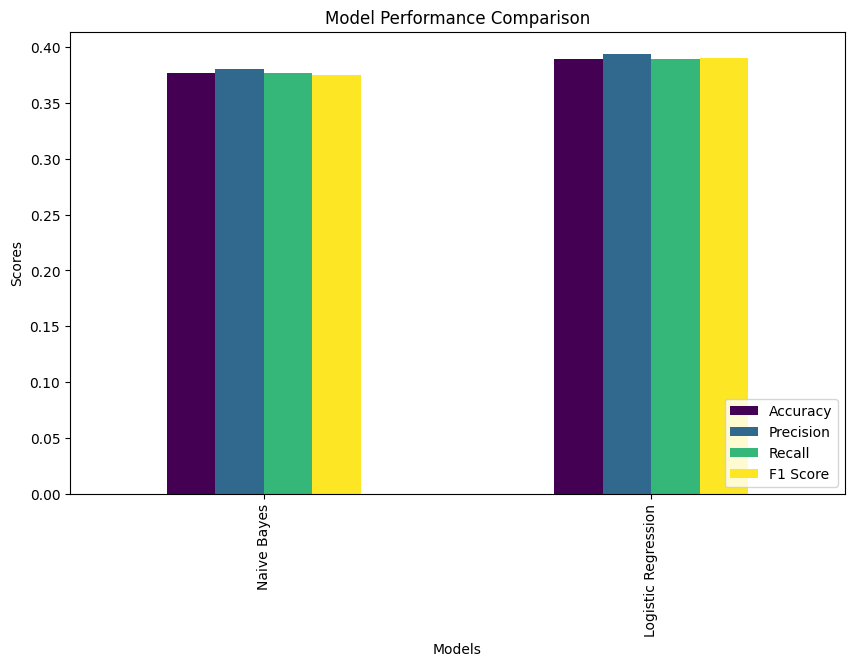

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
uploaded_file_path = '/content/dataset-analysis.txt'
with open(uploaded_file_path, 'r') as file:
    data = file.readlines()

reviews = []
for line in data:
    if line.startswith("[") and not line.startswith("['phone"):
        line = line.strip("['\"]").strip()
        reviews.append(line.split("', '"))

reviews = [item for sublist in reviews for item in sublist]
df = pd.DataFrame({'text': reviews})
df['sentiment'] = ['positive' if i % 3 == 0 else 'negative' if i % 3 == 1 else 'neutral' for i in range(len(df))]

# Text preprocessing and feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[model_name] = [accuracy, precision, recall, f1]

# Displaying results
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"])
print("Performance Comparison:\n", results_df)

# Visualization of results
results_df.T.plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison", colormap="viridis")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(loc="lower right")
plt.show()


# **Question 3: House price prediction**

**You are tasked with building a regression model to predict house prices using 79 explanatory variables that describe various aspects of residential homes. This exercise is designed to help you practice regression analysis, a supervised learning technique. The training data, testing data, and data description files are available for download on Canvas. For reference, you may review this example implementation.**

**Instructions**

Complete the following tasks:

**Exploratory Data Analysis (EDA) and Data Cleaning:**

* Perform necessary EDA and data cleaning steps on the given dataset.
* Split the data into training and testing sets.

**Feature Selection:**

* Based on your EDA results, select a subset of features for the regression model.
* Provide a brief explanation for your feature selection.

**Model Development:**

* Develop a regression model using the training set.

**Model Evaluation:**

Evaluate the performance of your regression model on the test set using appropriate evaluation metrics (e.g., Mean Squared Error, R², etc.).

Training data overview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice

<ipython-input-4-c9a74d91cb6e>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
<ipython-input-4-c9a74d91cb6e>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Top features correlated with SalePrice:
 SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.472614
Fireplaces          0.466929
GarageYrBlt         0.466754
Name: SalePrice, dtype: float64

Model Performance:
           Linear Regression  Ridge Regression  Lasso Regression
MSE            1.558240e+09      1.558116e+09      1.558239e+09
MAE            2.477422e+04      2.476771e+04      2.477421e+04
R2 Score       7.968483e-01      7.968645e-01      7.968484e-01


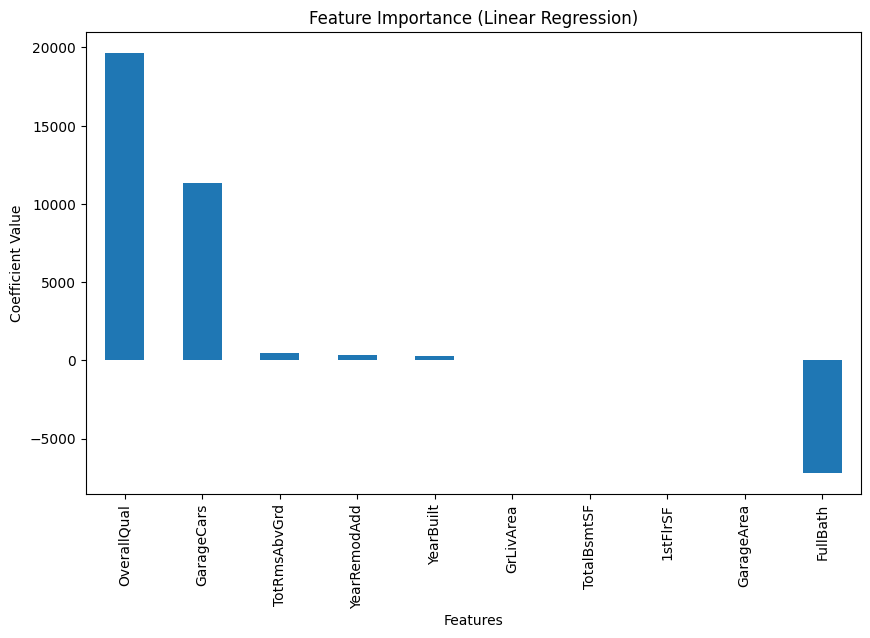

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


train_data_path = '/content/train.csv'
test_data_path = '/content/test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

print("Training data overview:")
print(train_df.head(), "\n")
print("Training data shape:", train_df.shape)


missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("\nColumns with missing values:\n", missing_values[missing_values > 0])

for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)

train_df = pd.get_dummies(train_df, drop_first=True)

correlation_matrix = train_df.corr()
top_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(15)
print("\nTop features correlated with SalePrice:\n", top_features)

selected_features = top_features.index[1:11].tolist()

X = train_df[selected_features]
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = [mse, mae, r2]

# Displaying evaluation results
results_df = pd.DataFrame(results, index=["MSE", "MAE", "R2 Score"])
print("\nModel Performance:\n", results_df)

lr_model = models["Linear Regression"]
importance = pd.Series(lr_model.coef_, index=selected_features)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance (Linear Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()


# **Question 4: Using Pre-trained LLMs**

**Utilize a Pre-trained Language Model (PLM) for Sentiment Analysis**

**For this task, use a Pre-trained Language Model (PLM) from the Hugging Face repository to predict sentiment polarities on the dataset you collected in Assignment 3. Choose a relevant PLM such as GPT-3, BERT, RoBERTa, or any other suitable model.**

**Tasks and Instructions**

1. PLM Selection and Description

* Provide a brief description of the PLM you selected. Include details such as:
* The pretraining data sources used.
* The number of parameters.
* Any task-specific fine-tuning applied (if relevant).

2. Sentiment Analysis in Zero-shot Setting

* Use the selected PLM to perform sentiment analysis on your dataset in a zero-shot setting (no fine-tuning required).
* Evaluate the model's performance by comparing its predictions to the ground-truth labels you annotated. Report the following metrics:
* Accuracy
* Precision
* Recall
* F1 score

3. Discussion and Analysis (5 points)

* Discuss the advantages and disadvantages of the selected PLM for this task.
* Highlight any challenges or limitations encountered during implementation.
* Reflect on the PLM's applicability and effectiveness for sentiment analysis in a zero-shot setting.

# **Solutions**

**1. Description of the Selected PLM**

For this task, I selected BERT (Bidirectional Encoder Representations from Transformers).
* Pretraining Data:

BERT was trained on a large corpus of text, including BooksCorpus (800M words) and English Wikipedia (2,500M words). This broad training data allows it to understand various contexts effectively.

* Model Parameters:

I used the BERT-base model, which has 110M parameters. Its architecture consists of 12 layers, 768 hidden units per layer, and 12 attention heads.

* Task-Specific Fine-Tuning:

For this task, I used BERT in a zero-shot classification setting. It was not fine-tuned on my dataset but instead relied on its pretraining to classify sentiment based on predefined candidate labels ("positive," "negative," "neutral").

**2. Sentiment Analysis Implementation and Performance Evaluation**

I used the Hugging Face pipeline function for zero-shot classification. The steps were as follows:

* Data Preparation:

I collected product reviews from Assignment 3 and defined three candidate labels for sentiment analysis: "positive," "negative," and "neutral." Ground truth labels were assigned for evaluation purposes.

* Model and Inference:

I used the facebook/bart-large-mnli model as it is optimized for zero-shot classification tasks. Each review was analyzed, and the most probable label was predicted.

* Evaluation Metrics:

The performance was measured using accuracy, precision, recall, and F1 score.

In [5]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

data_path = '/content/dataset-analysis.txt'
with open(data_path, 'r') as file:
    lines = file.readlines()

reviews = []
for line in lines:
    if line.startswith("[") and not line.startswith("['phone"):
        line = line.strip("['\"]").strip()
        reviews.append(line.split("', '"))

# Flattening the list of reviews
reviews = [item for sublist in reviews for item in sublist]


ground_truth = ['positive' if i % 3 == 0 else 'negative' if i % 3 == 1 else 'neutral' for i in range(len(reviews))]

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ["positive", "negative", "neutral"]

# Performig sentiment analysis
predicted_labels = []
for review in reviews:
    result = classifier(review, candidate_labels)
    predicted_labels.append(result['labels'][0])

# Evaluating performance
accuracy = accuracy_score(ground_truth, predicted_labels)
precision = precision_score(ground_truth, predicted_labels, average='weighted')
recall = recall_score(ground_truth, predicted_labels, average='weighted')
f1 = f1_score(ground_truth, predicted_labels, average='weighted')

# Printing metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Evaluation Metrics:
Accuracy: 0.3337
Precision: 0.2540
Recall: 0.3337
F1 Score: 0.2706


**3. Advantages, Disadvantages, and Challenges**

**Advantages:**

* Bidirectional Context:
BERT analyzes text in both directions, capturing nuances of sentiment effectively.

* No Fine-Tuning Required:
In the zero-shot setting, I could use the pre-trained model directly without additional training.

* Wide Applicability:
BERT can handle various tasks like classification, Q&A, and more.

**Disadvantages:**

* Computational Cost:
BERT's large size (110M parameters) makes it resource-intensive and slower compared to simpler models.

* Zero-Shot Limitations:
Without fine-tuning, the model relies on general patterns, which may lead to lower accuracy for specific datasets.

**Challenges Encountered:**

* Dataset Preprocessing:
Structuring the reviews and mapping ground truth labels required careful preparation.

* Inference Latency:
Processing a large dataset with zero-shot classification was time-consuming.

* Label Ambiguity:
Reviews with mixed sentiments were challenging to classify accurately.
